In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

import warnings 
warnings.filterwarnings('ignore')

### Importing The DataSet

In [2]:
df_hr = pd.read_csv(r"C:\Users\lokes\OneDrive\Desktop\ml project\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
pd.set_option('display.max_columns',90) # for displaying all columns 

In [4]:
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
df_hr.shape

(1470, 35)

Data set contains 1470 rows and 35 columns.

In [6]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df_hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Backup Data

In [8]:
backup_data = df_hr.copy()

##### Checking Null values:

In [9]:
df_hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No null values in dataset.

### Exploratry Data Analysis(EDA)

In [10]:
sns.set(style='darkgrid') # setting greid in style

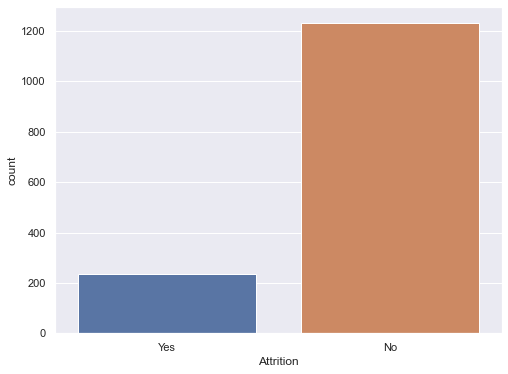

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x='Attrition',data=df_hr)

As per above we can see our target variable is imbalanced we have to balance it.

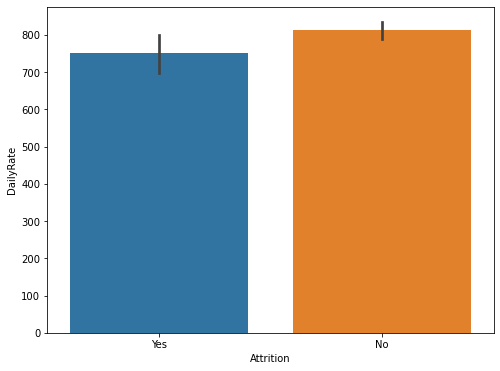

In [6]:
# Checking the relational information of Attrition and DailyRate
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='DailyRate',data=df_hr)

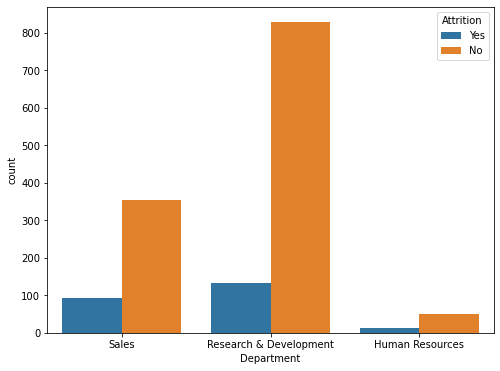

In [7]:
# Checking the relational information of Attrition and Department
plt.figure(figsize=(8,6))
sns.countplot(x='Department',hue='Attrition',data=df_hr)

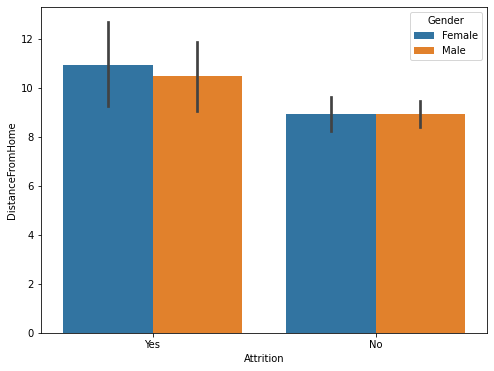

In [8]:
# Checking the relational information of Attrition and DistanceFromHome
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='DistanceFromHome',data=df_hr,hue='Gender')

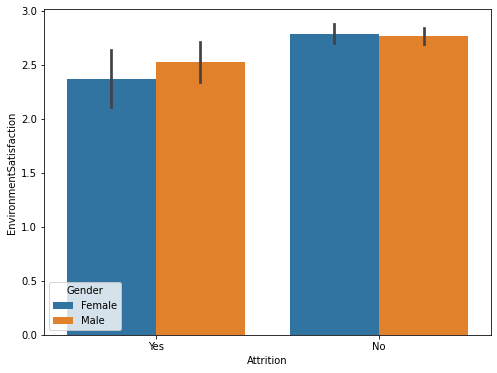

In [9]:
# Checking the relational information of Attrition and EnvironmentSatisfaction
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='EnvironmentSatisfaction',data=df_hr,hue='Gender')

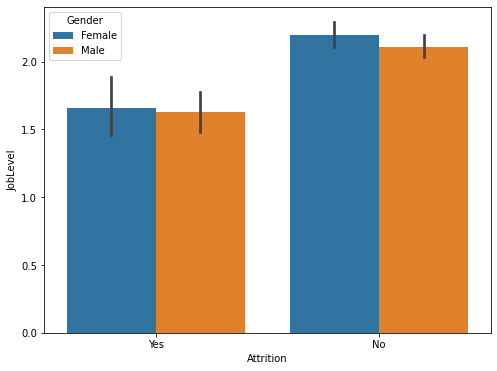

In [10]:
# Checking the relational information of Attrition and JobLevel
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='JobLevel',data=df_hr,hue='Gender')

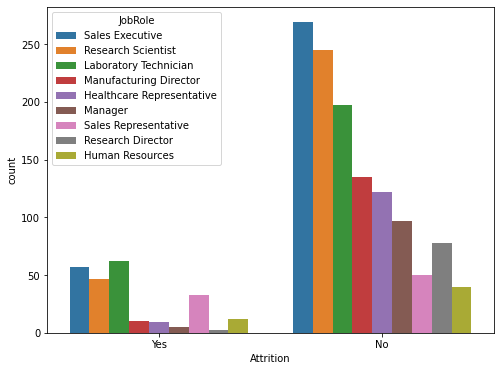

In [11]:
# Checking the relational information of Attrition and JobRole
plt.figure(figsize=(8,6))
sns.countplot(x='Attrition',data=df_hr,hue='JobRole')

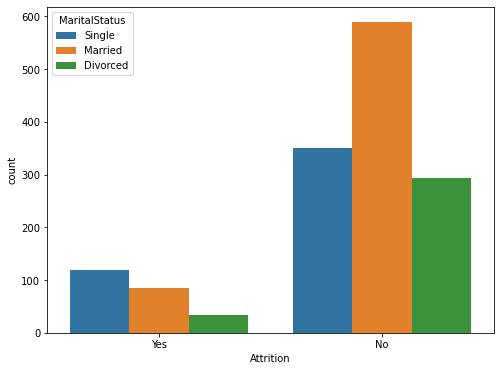

In [12]:
# Checking the relational information of Attrition and MaritalStatus
plt.figure(figsize=(8,6))
sns.countplot(x='Attrition',data=df_hr,hue='MaritalStatus')

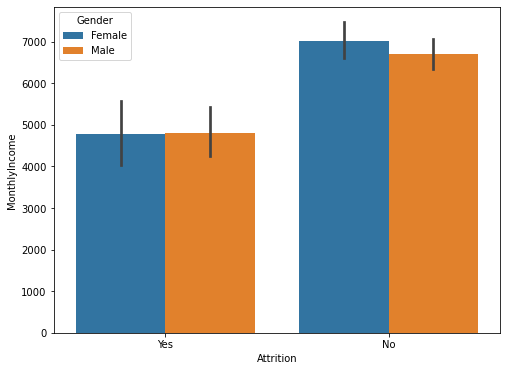

In [13]:
# Checking the relational information of Attrition and MonthlyIncome
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='MonthlyIncome',data=df_hr,hue='Gender')

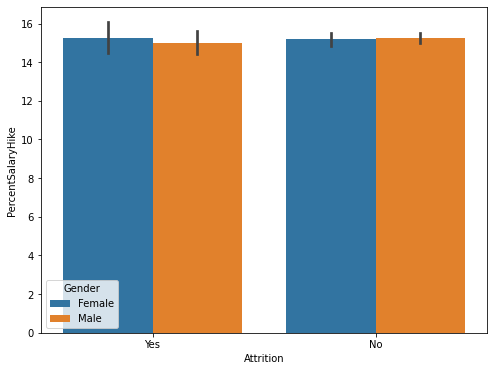

In [14]:
# Checking the relational information of Attrition and PercentSalaryHike
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='PercentSalaryHike',data=df_hr,hue='Gender')

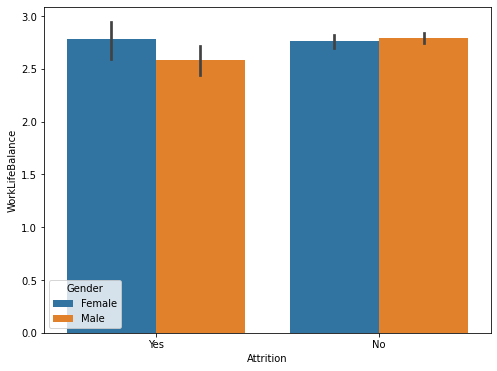

In [15]:
# Checking the relational information of Attrition and WorkLifeBalance
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='WorkLifeBalance',data=df_hr,hue='Gender')

Converting the target column into numeric :

In [22]:
df_hr['Attrition'] = df_hr['Attrition'].map({'Yes':1,'No':0})

In [23]:
df_hr['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [24]:
num_variables = df_hr.select_dtypes(['int64','float64']) # filttering the numeric columns
num_variables.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [25]:
correlation = num_variables.corr() # checking correlation

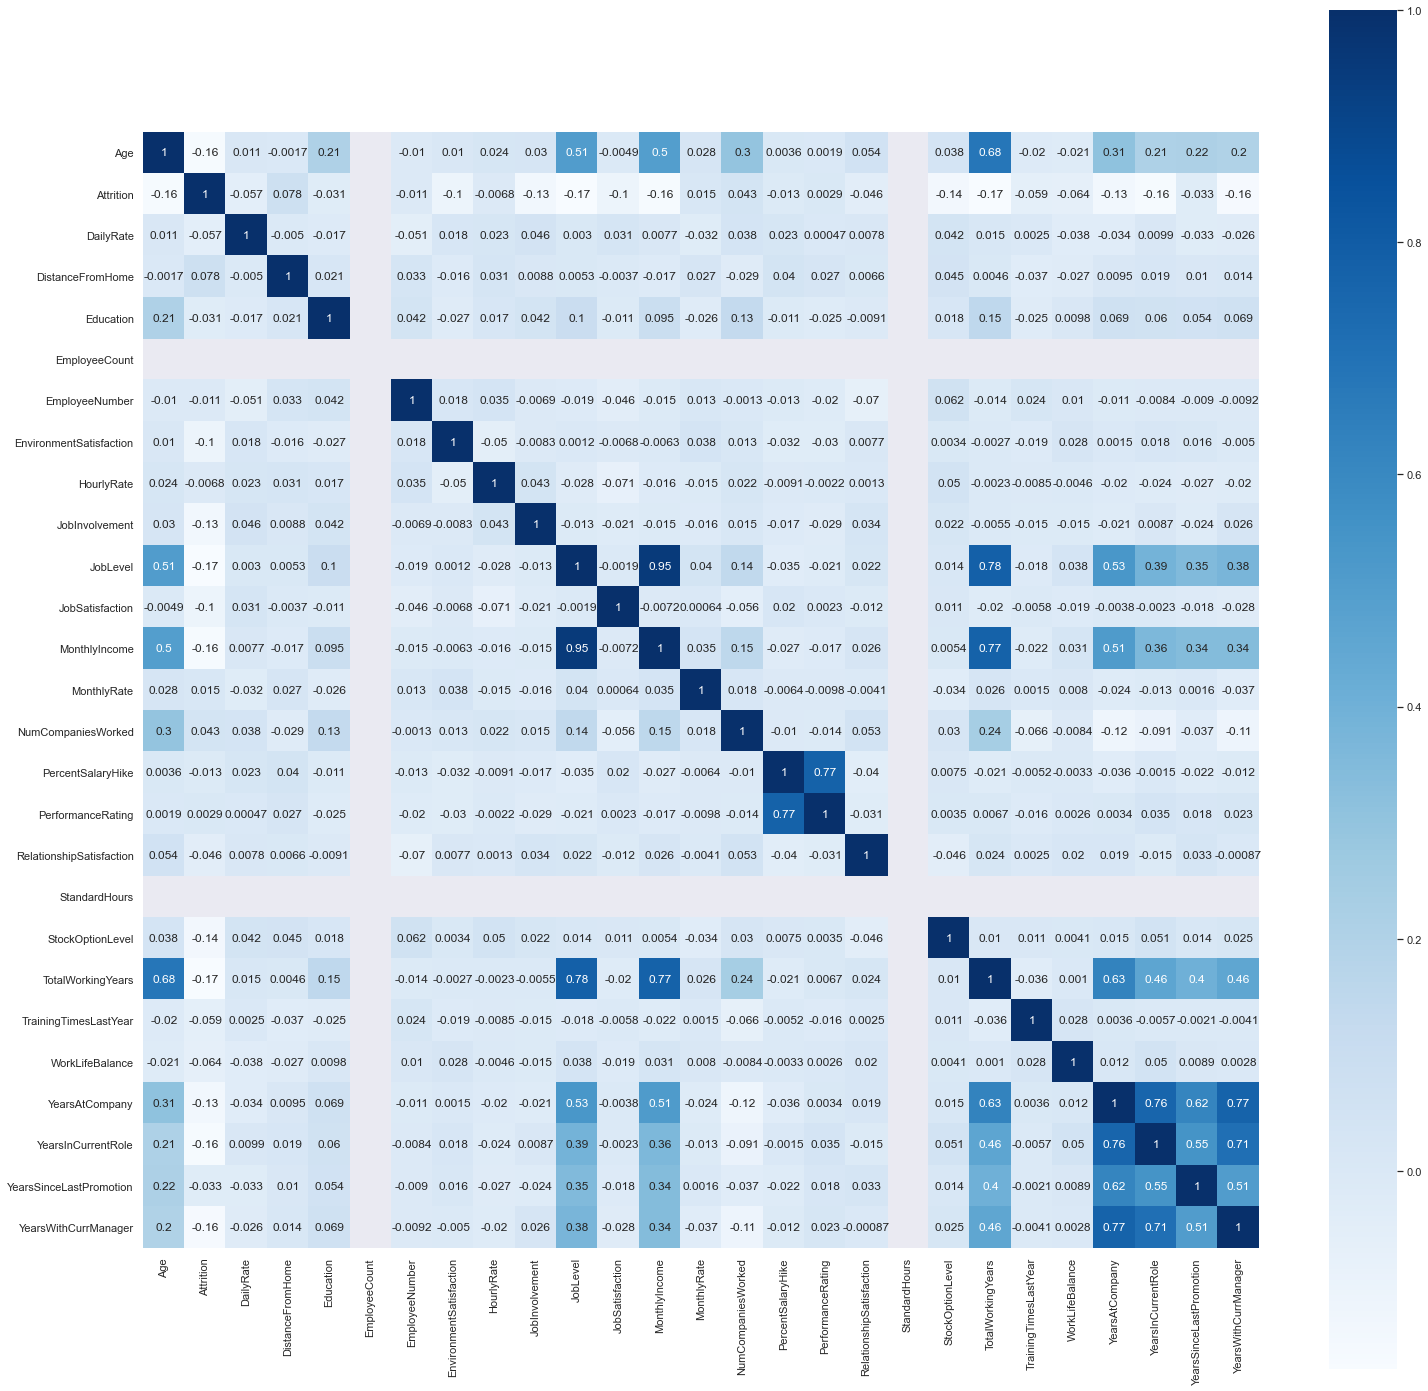

In [31]:
plt.figure(figsize=(25,25))
sns.heatmap(correlation,square=True,annot=True,cmap='Blues')

Here we can cehck there are few columns like'JobLevel','MonthlyIncome','TotalWorkingYears','TrainingTimesLastYear'and
'YearsWithCurrManager' seems correlate with each other.other hand many are of the features seems negatively corelated with
out target variables.will see in feature selection the contribution of each feature.

### Outliars Dectection and Removel

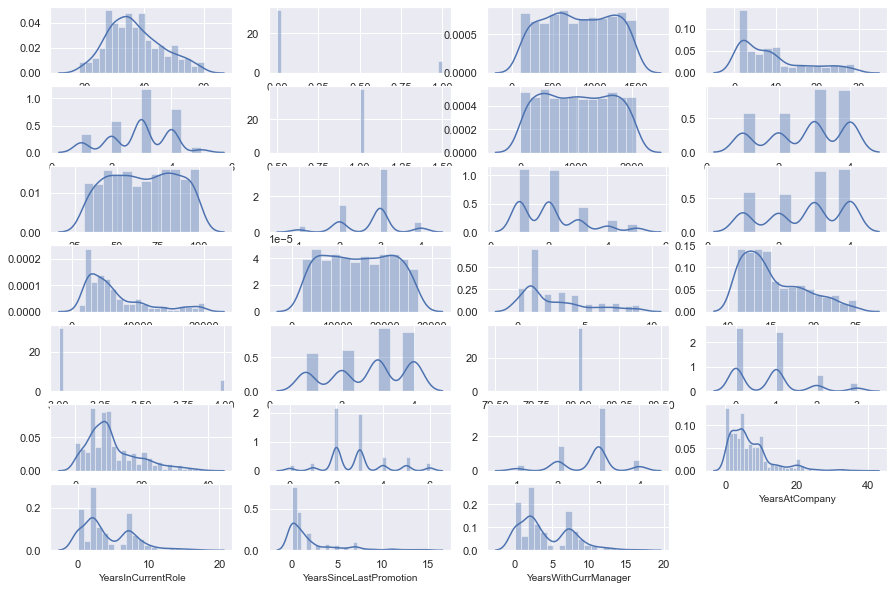

In [37]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in num_variables:
    if plotnumber <=27:
        plt.subplot(7,4,plotnumber)
        sns.distplot(num_variables[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

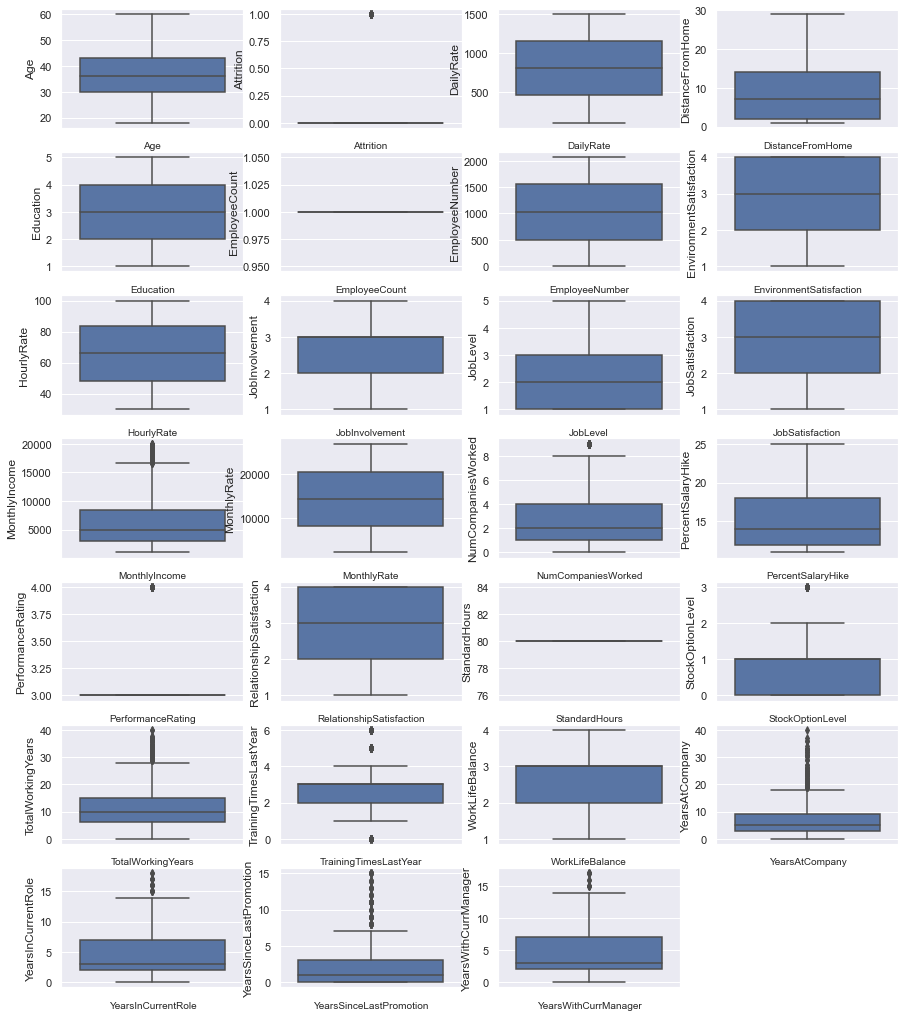

In [46]:
plt.figure(figsize=(15,18))
plotnumber=1
for column in num_variables:
    if plotnumber <=27:
        plt.subplot(7,4,plotnumber)
        sns.boxplot(num_variables[column],orient='v')
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

In [51]:
from sklearn.preprocessing import PowerTransformer

In [53]:
power = PowerTransformer(method='yeo-johnson')

In [57]:
df_hr['MonthlyIncome'] = power.fit_transform(df_hr['MonthlyIncome'].values.reshape(-1,1))
df_hr['NumCompaniesWorked'] = power.fit_transform(df_hr['NumCompaniesWorked'].values.reshape(-1,1))
df_hr['PerformanceRating'] = power.fit_transform(df_hr['PerformanceRating'].values.reshape(-1,1))
df_hr['StockOptionLevel'] = power.fit_transform(df_hr['StockOptionLevel'].values.reshape(-1,1))
df_hr['TotalWorkingYears'] = power.fit_transform(df_hr['TotalWorkingYears'].values.reshape(-1,1))
df_hr['TrainingTimesLastYear'] = power.fit_transform(df_hr['TrainingTimesLastYear'].values.reshape(-1,1))
df_hr['YearsAtCompany'] = power.fit_transform(df_hr['YearsAtCompany'].values.reshape(-1,1))
df_hr['YearsInCurrentRole'] = power.fit_transform(df_hr['YearsInCurrentRole'].values.reshape(-1,1))
df_hr['YearsSinceLastPromotion'] = power.fit_transform(df_hr['YearsSinceLastPromotion'].values.reshape(-1,1))

In [61]:
df_hr['YearsWithCurrManager'] = power.fit_transform(df_hr['YearsWithCurrManager'].values.reshape(-1,1))

In [62]:
num_variables1 = df_hr.select_dtypes(['int64','float64']) # filttering the numeric columns
num_variables1.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

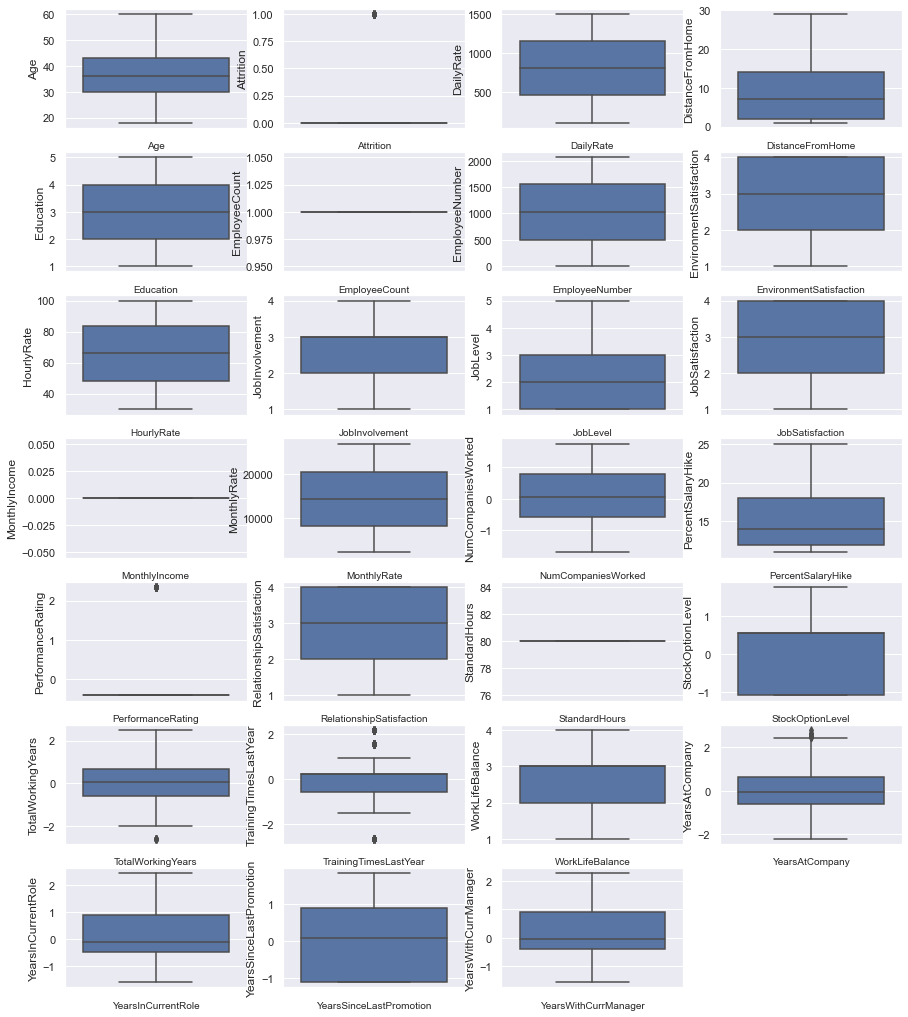

In [63]:
plt.figure(figsize=(15,18))
plotnumber=1
for column in num_variables1:
    if plotnumber <=27:
        plt.subplot(7,4,plotnumber)
        sns.boxplot(num_variables1[column],orient='v')
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

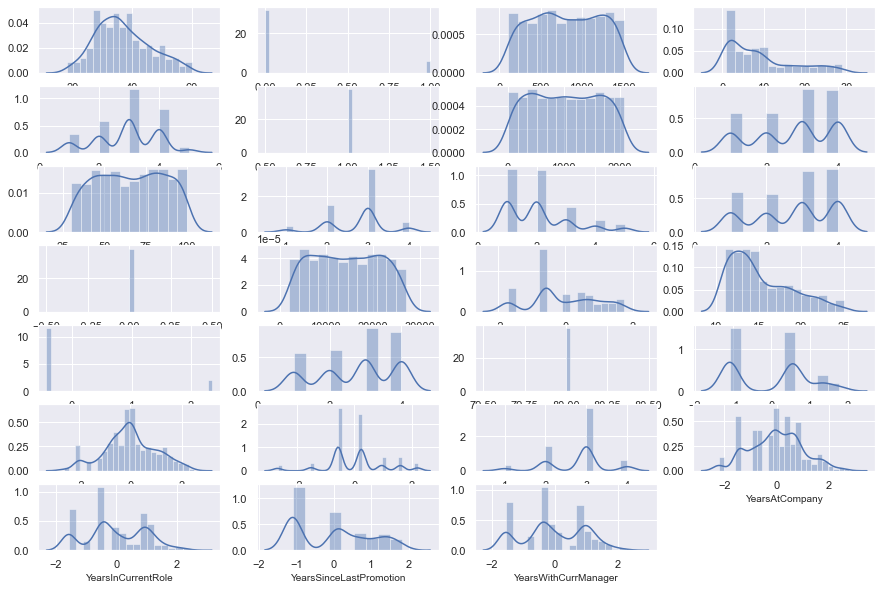

In [64]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in num_variables1:
    if plotnumber <=27:
        plt.subplot(7,4,plotnumber)
        sns.distplot(num_variables1[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

## Feature Engineering :

#### Endoding Categorical Variables :

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()

In [75]:
df_hr.Gender = le.fit_transform(df_hr.Gender)
df_hr.JobRole = le.fit_transform(df_hr.JobRole)
df_hr.MaritalStatus = le.fit_transform(df_hr.MaritalStatus)
df_hr.Over18 = le.fit_transform(df_hr.Over18)
df_hr.OverTime = le.fit_transform(df_hr.OverTime)
df_hr.BusinessTravel = le.fit_transform(df_hr.BusinessTravel)
df_hr.Department = le.fit_transform(df_hr.Department)
df_hr.EducationField = le.fit_transform(df_hr.EducationField)

In [76]:
df_hr.Gender = le.fit_transform(df_hr.Gender)
df_hr.JobRole = le.fit_transform(df_hr.JobRole)
df_hr.MaritalStatus = le.fit_transform(df_hr.MaritalStatus)
df_hr.Over18 = le.fit_transform(df_hr.Over18)
df_hr.OverTime = le.fit_transform(df_hr.OverTime)
df_hr.BusinessTravel = le.fit_transform(df_hr.BusinessTravel)
df_hr.Department = le.fit_transform(df_hr.Department)
df_hr.EducationField = le.fit_transform(df_hr.EducationField)

In [77]:
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,0.0,19479,1.598759,0,1,11,-0.426230,1,80,-1.091127,-0.241151,-2.668983,1,0.134067,0.189852,-1.094862,0.490147
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,0.0,24907,-0.561809,0,0,23,2.346151,4,80,0.557708,0.055901,0.234252,3,0.760769,0.881973,0.096854,0.909635
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,0.0,2396,1.261831,0,1,15,-0.426230,2,80,-1.091127,-0.407803,0.234252,3,-2.210153,-1.573699,-1.094862,-1.550156
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,0.0,23159,-0.561809,0,1,11,-0.426230,3,80,-1.091127,-0.241151,0.234252,3,0.478317,0.881973,0.905592,-1.550156
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,0.0,16632,1.737628,0,0,12,-0.426230,4,80,0.557708,-0.590084,0.234252,3,-0.951587,-0.459489,0.607464,-0.406881


### Feature Selection :

Univariate Selection :

In [78]:
from sklearn.ensemble import ExtraTreesClassifier

Spliting the Data :

In [94]:
X_feature = df_hr.drop(['Attrition'],axis=1)
y_feature = df_hr['Attrition']

In [95]:
model = ExtraTreesClassifier()

In [97]:
model.fit(X_feature,y_feature)

ExtraTreesClassifier()

In [98]:
print(model.feature_importances_)

[0.04142838 0.02466805 0.03163848 0.02312734 0.03796626 0.02934436
 0.02876929 0.         0.03212775 0.03697379 0.02214938 0.03300832
 0.03483229 0.03534176 0.03328245 0.03572585 0.03117009 0.
 0.03060203 0.03231963 0.         0.06575548 0.02989937 0.01410542
 0.0324812  0.         0.0361652  0.04417838 0.03133396 0.03348254
 0.03832095 0.0330806  0.0276345  0.0390869 ]


In [83]:
fearures_rank = pd.Series(model.feature_importances_,index=X.columns)
fearures_rank

Age                         0.042716
BusinessTravel              0.025941
DailyRate                   0.031653
Department                  0.022190
DistanceFromHome            0.035478
Education                   0.028657
EducationField              0.030134
EmployeeCount               0.000000
EmployeeNumber              0.031309
EnvironmentSatisfaction     0.036999
Gender                      0.022750
HourlyRate                  0.033089
JobInvolvement              0.033643
JobLevel                    0.035049
JobRole                     0.033937
JobSatisfaction             0.036669
MaritalStatus               0.035387
MonthlyIncome               0.000000
MonthlyRate                 0.032618
NumCompaniesWorked          0.031130
Over18                      0.000000
OverTime                    0.066138
PercentSalaryHike           0.029393
PerformanceRating           0.013598
RelationshipSatisfaction    0.030813
StandardHours               0.000000
StockOptionLevel            0.033941
T

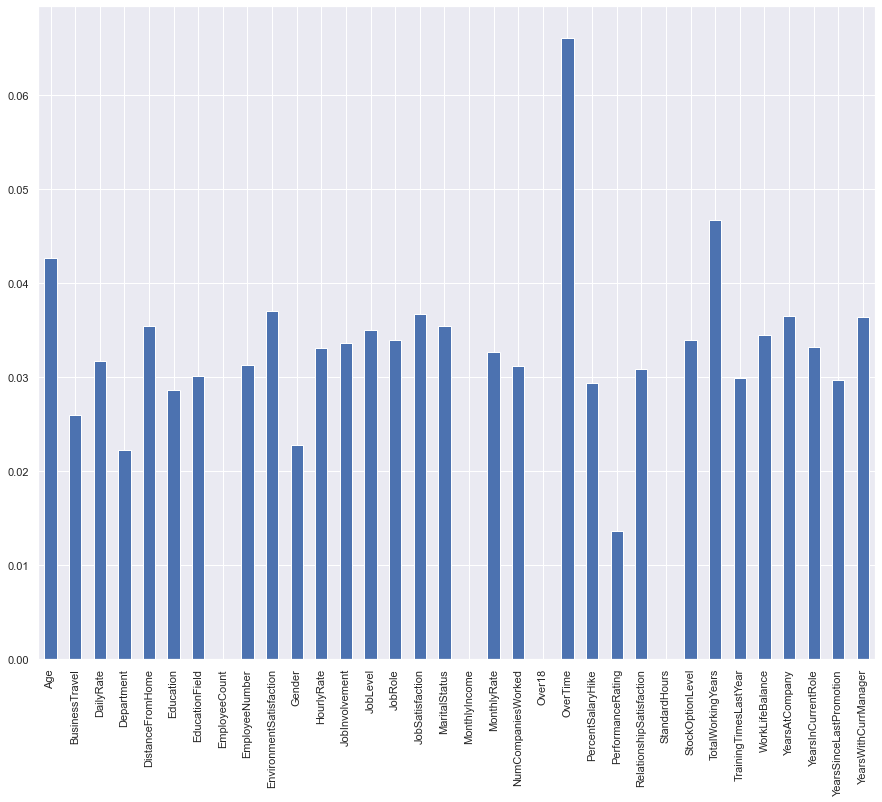

In [86]:
plt.figure(figsize=(15,12))
fearures_rank.plot(kind='bar')

This technique gives a score for each feature of our data,the higher the score more relative it is.

## Dealing with Imbalanced Data

In [99]:
from sklearn.utils import resample # using resample method

In [100]:
minority = df_hr[df_hr.Attrition==1]
majority = df_hr[df_hr.Attrition==0]

minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0])
df_hr = pd.concat([minority_upsample, majority], axis=0)

In [102]:
df_hr['Attrition'].value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

#### Spliting the data into dependent and independent variables

Here we are droping the 'EmployeeCount','MonthlyIncome','Over18','StandardHours' columns as they are less contributing
inorder to prediction.

In [104]:
X = df_hr.drop(['Attrition','EmployeeCount','MonthlyIncome','Over18','StandardHours'],axis=1)
y = df_hr['Attrition']

## Model Building :

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [106]:
scaler = StandardScaler()

In [107]:
x_scaler = scaler.fit_transform(X)

In [108]:
X_train,X_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.25,random_state=111)

Importing libraries for model building......!

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [111]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()
svm=SVC()
gdboost=GradientBoostingClassifier()
print("Model is created")

Model is created


In [112]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
gdboost.fit(X_train,y_train)

print("Model is trained")

Model is trained


In [113]:
print("Lr classification score",lr.score(X_train,y_train))
print("knn classification score",knn.score(X_train,y_train))
print("dt classification score",dt.score(X_train,y_train))
print("rf classification score",rf.score(X_train,y_train))
print("adb classification score",adb.score(X_train,y_train))
print("svm classification score",svm.score(X_train,y_train))
print("gdboost classification score",gdboost.score(X_train,y_train))

Lr classification score 0.7787993510005409
knn classification score 0.9021092482422931
dt classification score 1.0
rf classification score 1.0
adb classification score 0.8426176311519741
svm classification score 0.9588967009194159
gdboost classification score 0.9361817198485668


### Model Evaluation :

Using confusion matrix in order to evaluate the models accuracy.

In [115]:
lr_yprad = lr.predict(X_test)
knn_yprad = knn.predict(X_test)
dt_yprad = dt.predict(X_test)
rf_yprad = rf.predict(X_test)
adb_yprad = adb.predict(X_test)
svm_yprad = svm.predict(X_test)
gdboost_yprad = gdboost.predict(X_test)

In [123]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[226  75]
 [ 70 246]]


In [124]:
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for knn_model",'\n',knn_conf_mat)

confusion matrix for knn_model 
 [[228  73]
 [ 32 284]]


In [125]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

confusion matrix for dt_model 
 [[240  61]
 [  6 310]]


In [126]:
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for lr_model",'\n',rf_conf_mat)

confusion matrix for lr_model 
 [[291  10]
 [  7 309]]


In [127]:
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for lr_model",'\n',adb_conf_mat)

confusion matrix for lr_model 
 [[247  54]
 [ 61 255]]


In [128]:
svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for svm_model",'\n',svm_conf_mat)

confusion matrix for svm_model 
 [[268  33]
 [ 18 298]]


In [129]:
gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for gdboost_model",'\n',gdboost_conf_mat)

confusion matrix for gdboost_model 
 [[259  42]
 [ 33 283]]


In [132]:
lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)


svm_report = classification_report(y_test,svm_yprad)
print(" adb classification_report" ,'\n',svm_report)


gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)

 lr classification_report 
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       301
           1       0.77      0.78      0.77       316

    accuracy                           0.76       617
   macro avg       0.76      0.76      0.76       617
weighted avg       0.76      0.76      0.76       617

 knn classification_report 
               precision    recall  f1-score   support

           0       0.88      0.76      0.81       301
           1       0.80      0.90      0.84       316

    accuracy                           0.83       617
   macro avg       0.84      0.83      0.83       617
weighted avg       0.84      0.83      0.83       617

 dt classification_report 
               precision    recall  f1-score   support

           0       0.98      0.80      0.88       301
           1       0.84      0.98      0.90       316

    accuracy                           0.89       617
   macro avg       0.91      0.89      0.89

### ROC AND AUC :

for performance measurement..........!

In [131]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [133]:
print(roc_auc_score(y_test,lr.predict(X_test)))
print(roc_auc_score(y_test,knn.predict(X_test)))
print(roc_auc_score(y_test,dt.predict(X_test)))
print(roc_auc_score(y_test,rf.predict(X_test)))
print(roc_auc_score(y_test,adb.predict(X_test)))
print(roc_auc_score(y_test,svm.predict(X_test)))
print(roc_auc_score(y_test,gdboost.predict(X_test)))

0.7646557887211406
0.828104630135834
0.889177425459439
0.9723127549518482
0.8137800159804869
0.916701711594264
0.8780173682661171


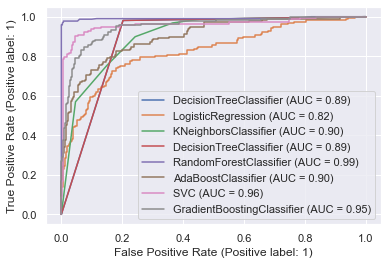

In [134]:
#lets find roc curve to check best fittted model
disp = plot_roc_curve(dt,X_test,y_test)
plot_roc_curve(lr,X_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,X_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,X_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,X_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,X_test,y_test,ax=disp.ax_)
plt.legend(prop = {'size':11}, loc ='lower right')

## CrossValidation :

In [135]:
from sklearn.model_selection import KFold,cross_val_score

In [136]:
k_f = KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [138]:
print("Cross validation score for lr model","=>",cross_val_score(lr,X,y,cv=5))
print("Cross validation score for knn model","=>",cross_val_score(knn,X,y,cv=5))
print("Cross validation score for dt model","=>",cross_val_score(dt,X,y,cv=5))
print("Cross validation score for rf model","=>",cross_val_score(rf,X,y,cv=5))
print("Cross validation score for adb model","=>",cross_val_score(adb,X,y,cv=5))
print("Cross validation score for SVM model","=>",cross_val_score(svm,X,y,cv=5))
print("Cross validation score for gdboost model","=>",cross_val_score(gdboost,X,y,cv=5))

Cross validation score for lr model => [0.49190283 0.60040568 0.59229209 0.6653144  0.42190669]
Cross validation score for knn model => [0.6194332  0.68559838 0.61257606 0.61054767 0.5821501 ]
Cross validation score for dt model => [0.49595142 0.9127789  0.88032454 0.84381339 0.5010142 ]
Cross validation score for rf model => [0.51012146 0.96348884 0.96551724 0.95537525 0.52129817]
Cross validation score for adb model => [0.40890688 0.67545639 0.62271805 0.56592292 0.4158215 ]
Cross validation score for SVM model => [0.28744939 0.45841785 0.4989858  0.48275862 0.29208925]
Cross validation score for gdboost model => [0.4534413  0.61257606 0.67139959 0.65922921 0.45030426]


In [142]:
print("Mean of Cross validation score for lr model","=>",cross_val_score(lr,X,y,cv=5).mean())
print("Mean of Cross validation score for knn model","=>",cross_val_score(knn,X,y,cv=5).mean())
print("Mean of Cross validation score for dt model","=>",cross_val_score(dt,X,y,cv=5).mean())
print("Mean of Cross validation score for rf model","=>",cross_val_score(rf,X,y,cv=5).mean())
print("Mean of Cross validation score for adb model","=>",cross_val_score(adb,X,y,cv=5).mean())
print("Mean of Cross validation score for SVM model","=>",cross_val_score(svm,X,y,cv=5).mean())
print("Mean of Cross validation score for gdboost  model","=>",cross_val_score(gdboost,X,y,cv=5).mean())

Mean of Cross validation score for lr model => 0.5543643396210921
Mean of Cross validation score for knn model => 0.6220610818667828
Mean of Cross validation score for dt model => 0.7263732744249453
Mean of Cross validation score for rf model => 0.7835732645703821
Mean of Cross validation score for adb model => 0.5377651493376912
Mean of Cross validation score for SVM model => 0.40394018280214505
Mean of Cross validation score for gdboost  model => 0.5673616871011982


In [144]:
print(0.5543643396210921-0.76)
print(0.6220610818667828-0.83)
print(0.7263732744249453-0.89)
print(0.7835732645703821-0.97)
print(0.5377651493376912-0.81)
print(0.40394018280214505-0.92)
print(0.5673616871011982-0.88)

-0.2056356603789079
-0.2079389181332172
-0.16362672557505475
-0.18642673542961785
-0.2722348506623089
-0.516059817197855
-0.31263831289880184


In the cross validation i found our 'Decesiontree model' can be a good predictor for our problem statemnet.and In oder to increase the chances of accuracy we will check the hyperparameter tuning.

## HyperParameter Tuning !

In [154]:
from sklearn.model_selection import GridSearchCV

In [155]:
dt.get_params().keys()  # to check the parameters

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [157]:
parm_grid  = {'criterion':['gini','entropy'],
             'max_depth':[2,3,4],'min_samples_split':[2,3],
              'max_leaf_nodes':[3,5,6,8,10]}
parm_grid

{'criterion': ['gini', 'entropy'],
 'max_depth': [2, 3, 4],
 'min_samples_split': [2, 3],
 'max_leaf_nodes': [3, 5, 6, 8, 10]}

In [158]:
gridsearch = GridSearchCV(dt, param_grid = parm_grid , cv=5)

In [159]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'max_leaf_nodes': [3, 5, 6, 8, 10],
                         'min_samples_split': [2, 3]})

In [160]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 10,
 'min_samples_split': 2}

In [161]:
decesion_tree=DecisionTreeClassifier(criterion='entropy',max_depth=4,max_leaf_nodes=10,min_samples_split=2)

In [162]:
decesion_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10)

In [163]:
decesion_tree.score(X_train,y_train)

0.7447268793942672

After using the hyperparameter tuning We achived the 74% accuracy and without it was 0.89%

# Model saving

In [165]:
import pickle

In [166]:
ibm_hr_attrition = 'HR ATTRITION.pickle'

In [167]:
pickle.dump(dt,open(ibm_hr_attrition,'wb'))

## Thank You........!